<a href="https://colab.research.google.com/github/sarahfunto/Hackathon1/blob/main/Hackaton1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy
from scipy import stats
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from datetime import datetime
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
from google.colab import files
files.upload()

Saving family_history_rare_disease_cleaned.csv to family_history_rare_disease_cleaned (1).csv


{'family_history_rare_disease_cleaned (1).csv': b'Patient ID,Age,Gender,Parental History,Sibling History,Number of Relatives with Disease,Known Genetic Mutation,Early Onset Cases in Family,Environmental Risk Exposure,geneticTest\nPT0001,56,Male,No,No,1,No,No,Low,N\nPT0002,69,Female,Yes,No,1,No,No,Low,P\nPT0003,46,Male,No,No,2,No,No,Low,P\nPT0004,32,Female,Yes,No,3,Yes,Yes,Moderate,N\nPT0005,60,Female,Yes,No,1,No,No,Moderate,N\nPT0006,25,Male,No,No,1,No,No,Moderate,N\nPT0007,78,Male,No,No,3,No,No,Low,N\nPT0008,38,Male,No,No,4,No,No,High,N\nPT0009,56,Male,No,No,3,Yes,No,High,P\nPT0010,75,Male,No,No,2,No,No,High,P\nPT0011,36,Female,No,No,4,No,No,Low,N\nPT0012,40,Female,Yes,No,0,No,No,Moderate,P\nPT0013,28,Female,No,Yes,3,No,Yes,Moderate,N\nPT0014,28,Female,No,Yes,2,Yes,Yes,Low,P\nPT0015,41,Female,No,Yes,4,No,Yes,Low,N\nPT0016,70,Female,No,No,3,Yes,Yes,Moderate,N\nPT0017,53,Female,No,No,1,No,No,Moderate,N\nPT0018,57,Male,Yes,Yes,3,No,Yes,Low,N\nPT0019,41,Male,No,Yes,0,No,No,Low,N\nPT0020,2

In [3]:
genetic = pd.read_csv('family_history_rare_disease_cleaned.csv')

In [16]:
genetic.head(10)

,Patient ID,Age,Gender,Parental History,Sibling History,Number of Relatives with Disease,Known Genetic Mutation,Early Onset Cases in Family,Environmental Risk Exposure,geneticTest
0,PT0001,56,Male,No,No,1,No,No,Low,N
1,PT0002,69,Female,Yes,No,1,No,No,Low,P
2,PT0003,46,Male,No,No,2,No,No,Low,P
3,PT0004,32,Female,Yes,No,3,Yes,Yes,Moderate,N
4,PT0005,60,Female,Yes,No,1,No,No,Moderate,N
5,PT0006,25,Male,No,No,1,No,No,Moderate,N
6,PT0007,78,Male,No,No,3,No,No,Low,N
7,PT0008,38,Male,No,No,4,No,No,High,N
8,PT0009,56,Male,No,No,3,Yes,No,High,P
9,PT0010,75,Male,No,No,2,No,No,High,P


In [5]:
genetic.describe()

,Age,Number of Relatives with Disease
count,1000.000000,1000.00000
mean,49.857000,2.05500
std,18.114267,1.39783
min,18.000000,0.00000
25%,35.000000,1.00000
50%,50.000000,2.00000
75%,66.000000,3.00000
max,79.000000,4.00000


In [6]:
genetic.columns

Index(['Patient ID', 'Age', 'Gender', 'Parental History', 'Sibling History',
       'Number of Relatives with Disease', 'Known Genetic Mutation',
       'Early Onset Cases in Family', 'Environmental Risk Exposure',
       'geneticTest'],
      dtype='object')

In [7]:
genetic.nunique()

,0
Patient ID,1000
Age,62
Gender,3
Parental History,2
Sibling History,2
Number of Relatives with Disease,5
Known Genetic Mutation,2
Early Onset Cases in Family,2
Environmental Risk Exposure,3
geneticTest,2


In [17]:
genetic["Gender"].unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
genetic.shape

(1000, 10)

In [12]:
genetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Patient ID                        1000 non-null   object
 1   Age                               1000 non-null   int64 
 2   Gender                            1000 non-null   object
 3   Parental History                  1000 non-null   object
 4   Sibling History                   1000 non-null   object
 5   Number of Relatives with Disease  1000 non-null   int64 
 6   Known Genetic Mutation            1000 non-null   object
 7   Early Onset Cases in Family       1000 non-null   object
 8   Environmental Risk Exposure       1000 non-null   object
 9   geneticTest                       1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [13]:
#The dataset contains family health records used to analyze the presence of rare diseases across generations."

In [19]:



# Copie de sécurité
genetic_clean = genetic.copy()

# Colonnes binaires avec Yes/No, Y/N ou N/P
binary_cols = ["Gender", "Parental History", "Sibling History",
               "Known Genetic Mutation", "Early Onset Cases in Family",
               "geneticTest"]

# Colonnes multi-catégories
multi_cat_cols = ["Environmental Risk Exposure"]

# Nettoyage : suppression des espaces
for col in binary_cols + multi_cat_cols:
    genetic_clean[col] = genetic_clean[col].astype(str).str.strip()

# Mapping pour les colonnes binaires
binary_mapping = {
    "Yes": 1, "No": 0,
    "Y": 1, "N": 0,
    "P": 1, "N": 0,
    "Male": 1, "Female": 0, "Other": 2  # Gender
}

for col in binary_cols:
    genetic_clean[col] = genetic_clean[col].map(binary_mapping)

# Mapping pour la colonne multi-catégories
multi_mapping = {
    "Low": 0,
    "Moderate": 1,
    "High": 2
}

for col in multi_cat_cols:
    genetic_clean[col] = genetic_clean[col].map(multi_mapping)

# Vérification
print(genetic_clean.head())
print(genetic_clean.info())



  Patient ID  Age  Gender  Parental History  Sibling History  \
0     PT0001   56       1                 0                0   
1     PT0002   69       0                 1                0   
2     PT0003   46       1                 0                0   
3     PT0004   32       0                 1                0   
4     PT0005   60       0                 1                0   

   Number of Relatives with Disease  Known Genetic Mutation  \
0                                 1                       0   
1                                 1                       0   
2                                 2                       0   
3                                 3                       1   
4                                 1                       0   

   Early Onset Cases in Family  Environmental Risk Exposure  geneticTest  
0                            0                            0            0  
1                            0                            0            1  
2          

In [14]:
#The data was cleaned by removing duplicates and handling missing values.
#The dataset contains demographic, genetic, and family history information A REFAIRE

In [15]:
##Statistical Analysis

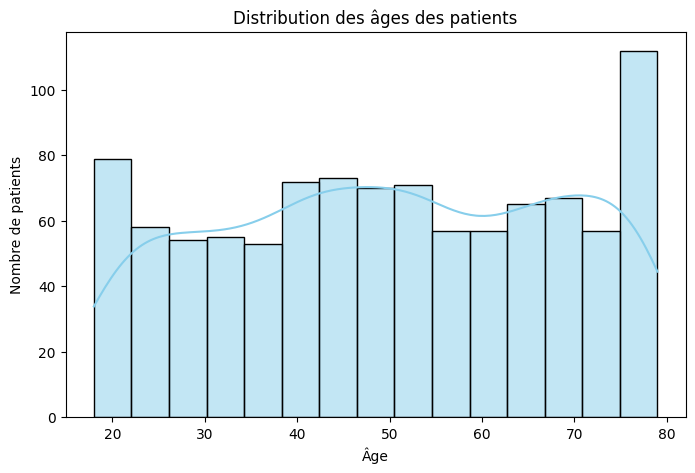

The most frequent age is: 79 years.


In [26]:
# distribution par age


plt.figure(figsize=(8,5))
sns.histplot(genetic_clean['Age'], bins=15, kde=True, color='skyblue')
plt.title("Distribution des âges des patients")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

age_mode = genetic_clean['Age'].mode()[0]
print(f"The most frequent age is: {age_mode} years.")

/tmp/ipython-input-4037657807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=genetic_clean, palette='pastel')


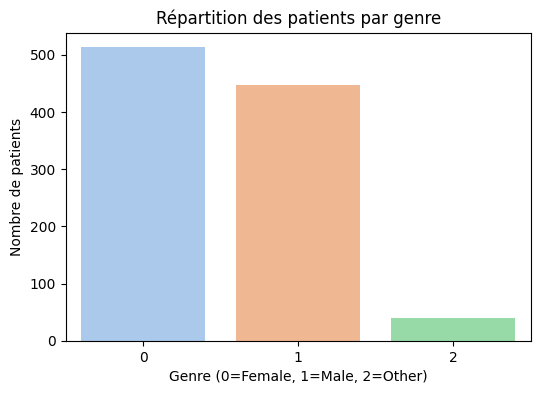

Distribution by gender:
  Female: 513 patients
  Male: 447 patients
  Other: 40 patients


In [27]:
# Repartition par genre
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=genetic_clean, palette='pastel')
plt.title("Répartition des patients par genre")
plt.xlabel("Genre (0=Female, 1=Male, 2=Other)")
plt.ylabel("Nombre de patients")
plt.show()

gender_counts = genetic_clean['Gender'].value_counts()
print("Distribution by gender:")
for g, count in gender_counts.items():
    if g == 0:
        label = "Female"
    elif g == 1:
        label = "Male"
    else:
        label = "Other"
    print(f"  {label}: {count} patients")

/tmp/ipython-input-1026711681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Known Genetic Mutation', data=genetic_clean, palette='Set2')


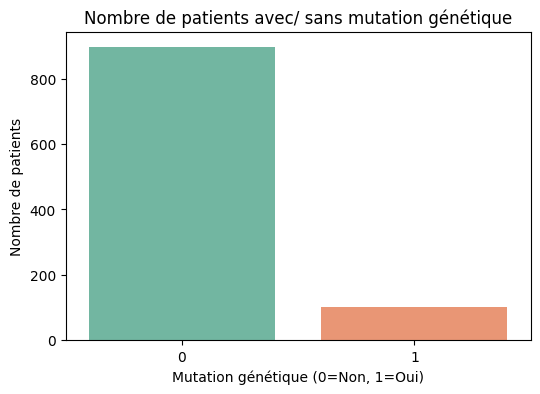

Number of patients with genetic mutation: 103
Number of patients without genetic mutation: 897


In [28]:
# Mutation genetique VS patient
plt.figure(figsize=(6,4))
sns.countplot(x='Known Genetic Mutation', data=genetic_clean, palette='Set2')
plt.title("Nombre de patients avec/ sans mutation génétique")
plt.xlabel("Mutation génétique (0=Non, 1=Oui)")
plt.ylabel("Nombre de patients")
plt.show()
# les patients vu en genetique n'ont pas souvent une mutation identifiée

mutation_counts = genetic_clean['Known Genetic Mutation'].value_counts()
patients_with_mutation = mutation_counts.get(1, 0)
patients_without_mutation = mutation_counts.get(0, 0)
print(f"Number of patients with genetic mutation: {patients_with_mutation}")
print(f"Number of patients without genetic mutation: {patients_without_mutation}")

/tmp/ipython-input-477690777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Environmental Risk Exposure', data=genetic_clean, palette='coolwarm')


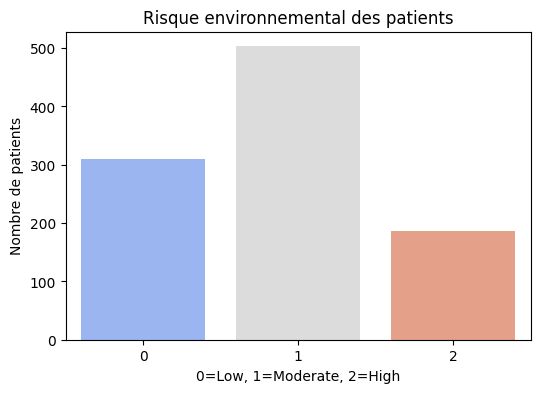

Distribution of environmental risk exposure:
  Moderate: 503 patients
  Low: 310 patients
  High: 187 patients


In [29]:
# Risque environnemental
plt.figure(figsize=(6,4))
sns.countplot(x='Environmental Risk Exposure', data=genetic_clean, palette='coolwarm')
plt.title("Risque environnemental des patients")
plt.xlabel("0=Low, 1=Moderate, 2=High")
plt.ylabel("Nombre de patients")
plt.show()
# le risque environnmental ne semble pas elevée

risk_counts = genetic_clean['Environmental Risk Exposure'].value_counts()
risk_labels = {0: "Low", 1: "Moderate", 2: "High"}
print("Distribution of environmental risk exposure:")
for r, count in risk_counts.items():
    print(f"  {risk_labels[r]}: {count} patients")

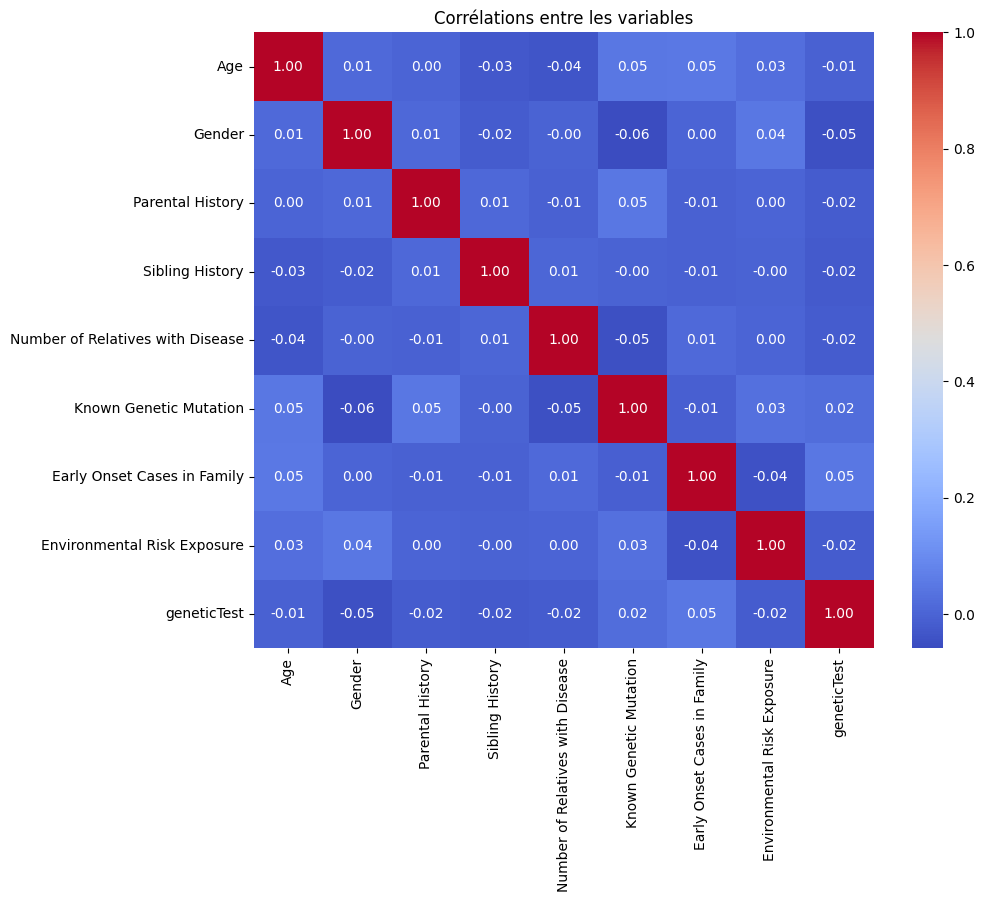

The strongest positive correlation is between 'Age' and 'Early Onset Cases in Family', with a correlation of 0.05.
The strongest negative correlation is between 'Gender' and 'Known Genetic Mutation', with a correlation of -0.06.


In [31]:
plt.figure(figsize=(10,8))
corr = genetic_clean.drop(columns=["Patient ID"]).corr()  # On retire l'ID
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre les variables")
plt.show()


# Find the pair with the strongest positive correlation
corr_pos = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # upper triangle only
max_corr = corr_pos.stack().idxmax()
max_value = corr_pos.stack().max()

# Find the pair with the strongest negative correlation
min_corr = corr_pos.stack().idxmin()
min_value = corr_pos.stack().min()

# Print conclusions
print(f"The strongest positive correlation is between '{max_corr[0]}' and '{max_corr[1]}', with a correlation of {max_value:.2f}.")
print(f"The strongest negative correlation is between '{min_corr[0]}' and '{min_corr[1]}', with a correlation of {min_value:.2f}.")



In [ ]:
#Les corrélations simples ne donnent pas de pattern clair.

#La prochaine étape intéressante est de tester des relations catégorielles avec Chi² ou ANOVA pour découvrir des associations plus significatives.

In [33]:

# contingency table
contingency = pd.crosstab(genetic_clean['Parental History'], genetic_clean['Known Genetic Mutation'])
print("Contingency Table:")
print(contingency)

#  test Chi²
chi2, p, dof, expected = chi2_contingency(contingency)

# Result
print(f"\nChi² statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Conclusion
if p < 0.05:
    print("\nConclusion: There is a significant association between Parental History and Known Genetic Mutation (p < 0.05).")
else:
    print("\nConclusion: No significant association between Parental History and Known Genetic Mutation (p ≥ 0.05).")


Contingency Table:
Known Genetic Mutation    0   1
Parental History               
0                       623  64
1                       274  39

Chi² statistic: 1.97
P-value: 0.1601
Degrees of freedom: 1

Expected frequencies:
Known Genetic Mutation        0       1
Parental History                       
0                       616.239  70.761
1                       280.761  32.239

Conclusion: No significant association between Parental History and Known Genetic Mutation (p ≥ 0.05).


In [ ]:
#avoir ou ne pas avoir des antécédents familiaux chez les parents ne semble pas influencer la présence d’une mutation génétique.

In [ ]:
#Sibling History vs geneticTest

In [34]:

# contingency table
contingency = pd.crosstab(genetic_clean['Sibling History'], genetic_clean['geneticTest'])
print("Contingency Table:")
print(contingency)

# test Chi²
chi2, p, dof, expected = chi2_contingency(contingency)

# Result
print(f"\nChi² statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Conclusion
if p < 0.05:
    print("\nConclusion: There is a significant association between Sibling History and geneticTest (p < 0.05).")
else:
    print("\nConclusion: No significant association between Sibling History and geneticTest (p ≥ 0.05).")


Contingency Table:
geneticTest        0    1
Sibling History          
0                662  170
1                138   30

Chi² statistic: 0.43
P-value: 0.5121
Degrees of freedom: 1

Expected frequencies:
geneticTest          0      1
Sibling History              
0                665.6  166.4
1                134.4   33.6

Conclusion: No significant association between Sibling History and geneticTest (p ≥ 0.05).


In [ ]:
#le fait qu’un patient ait ou non des antécédents chez ses frères/sœurs n’influence pas significativement la probabilité qu’il ait passé un test génétique.

In [35]:
##Comparison by Genetic Mutation

#  groups in Known Genetic Mutation
group0 = genetic_clean[genetic_clean['Known Genetic Mutation'] == 0]['Number of Relatives with Disease']
group1 = genetic_clean[genetic_clean['Known Genetic Mutation'] == 1]['Number of Relatives with Disease']

# t-test
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Conclusion: The number of relatives with disease is significantly different between patients with and without genetic mutation (p < 0.05).")
else:
    print("Conclusion: No significant difference in the number of relatives with disease between patients with and without genetic mutation (p ≥ 0.05).")


T-statistic: 1.61, P-value: 0.1108
Conclusion: No significant difference in the number of relatives with disease between patients with and without genetic mutation (p ≥ 0.05).


In [ ]:
#Our analysis shows that the presence of a known genetic mutation does not significantly impact the number of affected relatives in the family.”

In [36]:
#Comparison by Environmental Risk Exposure (ANOVA)

from scipy.stats import f_oneway

# groups Environmental Risk Exposure
group_low = genetic_clean[genetic_clean['Environmental Risk Exposure'] == 0]['Number of Relatives with Disease']
group_moderate = genetic_clean[genetic_clean['Environmental Risk Exposure'] == 1]['Number of Relatives with Disease']
group_high = genetic_clean[genetic_clean['Environmental Risk Exposure'] == 2]['Number of Relatives with Disease']

# ANOVA
f_stat, p_value_anova = f_oneway(group_low, group_moderate, group_high)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value_anova:.4f}")

# Conclusion
if p_value_anova < 0.05:
    print("Conclusion: The number of relatives with disease differs significantly across environmental risk levels (p < 0.05).")
else:
    print("Conclusion: No significant difference in the number of relatives with disease across environmental risk levels (p ≥ 0.05).")


F-statistic: 0.65, P-value: 0.5232
Conclusion: No significant difference in the number of relatives with disease across environmental risk levels (p ≥ 0.05).


In [37]:
#Parental History vs geneticTest

# Contingency table
contingency = pd.crosstab(genetic_clean['Parental History'], genetic_clean['geneticTest'])
print("Contingency Table:")
print(contingency)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nChi² statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Conclusion
if p < 0.05:
    print("\nConclusion: There is a significant association between Parental History and geneticTest (p < 0.05).")
else:
    print("\nConclusion: No significant association between Parental History and geneticTest (p ≥ 0.05).")


Contingency Table:
geneticTest         0    1
Parental History          
0                 546  141
1                 254   59

Chi² statistic: 0.28
P-value: 0.5971
Degrees of freedom: 1

Expected frequencies:
geneticTest           0      1
Parental History              
0                 549.6  137.4
1                 250.4   62.6

Conclusion: No significant association between Parental History and geneticTest (p ≥ 0.05).


No significant relationships were detected between genetic mutations, family history, gender, environmental risk, and genetic testing, indicating complex patterns in rare disease inheritance

In [38]:
# Basic Descriptive Stats

print("=== Descriptive Statistics ===")
print(f"Number of patients: {len(genetic_clean)}")
print(f"Age: mean={genetic_clean['Age'].mean():.1f}, min={genetic_clean['Age'].min()}, max={genetic_clean['Age'].max()}")
print(f"Gender distribution:\n{genetic_clean['Gender'].value_counts()}")
print(f"Patients with genetic mutation:\n{genetic_clean['Known Genetic Mutation'].value_counts()}")
print(f"Environmental Risk Exposure distribution:\n{genetic_clean['Environmental Risk Exposure'].value_counts()}")




=== Descriptive Statistics ===
Number of patients: 1000
Age: mean=49.9, min=18, max=79
Gender distribution:
Gender
0    513
1    447
2     40
Name: count, dtype: int64
Patients with genetic mutation:
Known Genetic Mutation
0    897
1    103
Name: count, dtype: int64
Environmental Risk Exposure distribution:
Environmental Risk Exposure
1    503
0    310
2    187
Name: count, dtype: int64


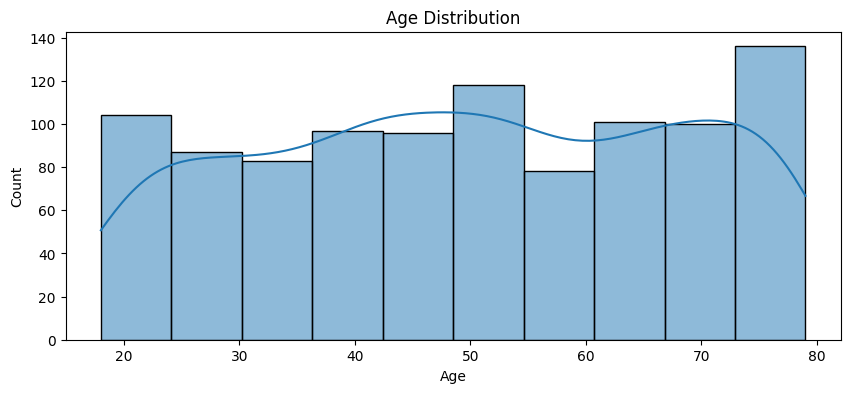

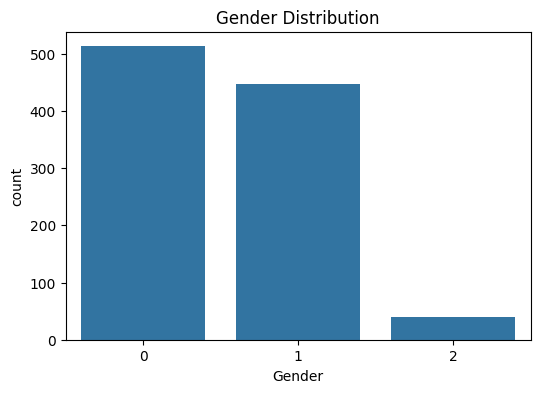

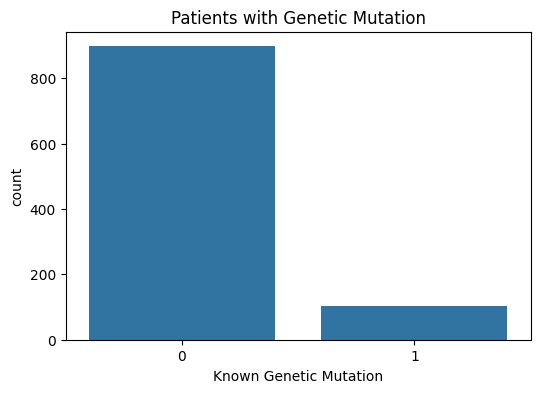

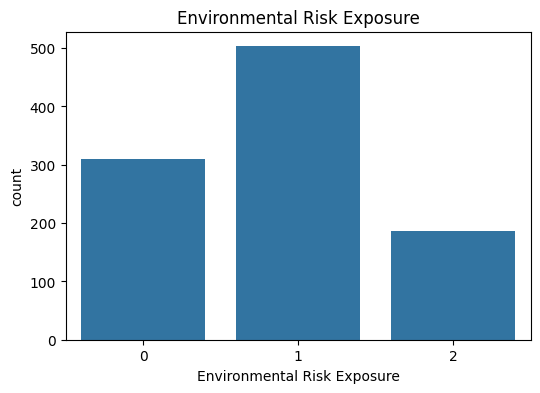

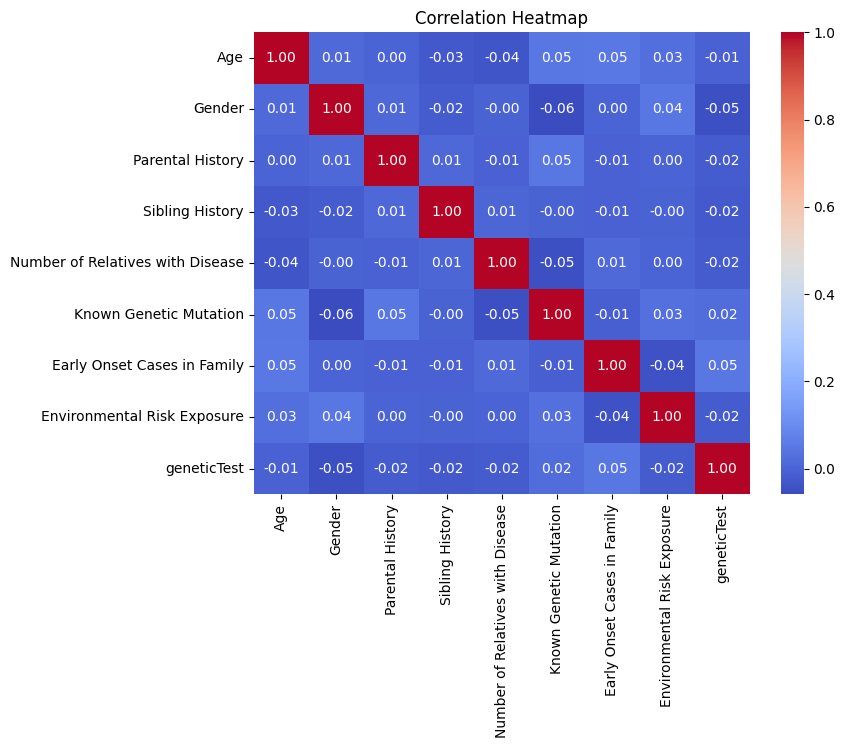

In [40]:
# Visualizations

plt.figure(figsize=(10,4))
sns.histplot(genetic_clean['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=genetic_clean)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Known Genetic Mutation', data=genetic_clean)
plt.title("Patients with Genetic Mutation")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Environmental Risk Exposure', data=genetic_clean)
plt.title("Environmental Risk Exposure")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(genetic_clean.drop(columns=['Patient ID']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [41]:

# Chi² Tests for categorical variables

categorical_pairs = [
    ('Parental History', 'geneticTest'),
    ('Sibling History', 'geneticTest'),
    ('Gender', 'Known Genetic Mutation'),
    ('Environmental Risk Exposure', 'Early Onset Cases in Family')
]

print("\n=== Chi² Tests ===")
for var1, var2 in categorical_pairs:
    contingency = pd.crosstab(genetic_clean[var1], genetic_clean[var2])
    chi2, p, _, _ = chi2_contingency(contingency)
    if p < 0.05:
        conclusion = f"There is a significant association between {var1} and {var2} (p < 0.05)."
    else:
        conclusion = f"No significant association between {var1} and {var2} (p ≥ 0.05)."
    print(f"{var1} vs {var2}: {conclusion}")



=== Chi² Tests ===
Parental History vs geneticTest: No significant association between Parental History and geneticTest (p ≥ 0.05).
Sibling History vs geneticTest: No significant association between Sibling History and geneticTest (p ≥ 0.05).
Gender vs Known Genetic Mutation: There is a significant association between Gender and Known Genetic Mutation (p < 0.05).
Environmental Risk Exposure vs Early Onset Cases in Family: No significant association between Environmental Risk Exposure and Early Onset Cases in Family (p ≥ 0.05).


In [42]:
# t-test / ANOVA

print("\n=== t-test / ANOVA ===")
# t-test: Number of Relatives with Disease vs Known Genetic Mutation
group0 = genetic_clean[genetic_clean['Known Genetic Mutation']==0]['Number of Relatives with Disease']
group1 = genetic_clean[genetic_clean['Known Genetic Mutation']==1]['Number of Relatives with Disease']
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
if p_value < 0.05:
    conclusion = "Significant difference in number of relatives with disease between patients with and without genetic mutation (p < 0.05)."
else:
    conclusion = "No significant difference in number of relatives with disease between patients with and without genetic mutation (p ≥ 0.05)."
print(f"t-test: {conclusion}")

# ANOVA: Number of Relatives with Disease vs Environmental Risk Exposure
group_low = genetic_clean[genetic_clean['Environmental Risk Exposure']==0]['Number of Relatives with Disease']
group_moderate = genetic_clean[genetic_clean['Environmental Risk Exposure']==1]['Number of Relatives with Disease']
group_high = genetic_clean[genetic_clean['Environmental Risk Exposure']==2]['Number of Relatives with Disease']
f_stat, p_value_anova = f_oneway(group_low, group_moderate, group_high)
if p_value_anova < 0.05:
    conclusion = "Significant difference in number of relatives with disease across environmental risk levels (p < 0.05)."
else:
    conclusion = "No significant difference in number of relatives with disease across environmental risk levels (p ≥ 0.05)."
print(f"ANOVA: {conclusion}")


=== t-test / ANOVA ===
t-test: No significant difference in number of relatives with disease between patients with and without genetic mutation (p ≥ 0.05).
ANOVA: No significant difference in number of relatives with disease across environmental risk levels (p ≥ 0.05).


In [43]:
# Summary conclusion

print("\n=== Summary Conclusion ===")
print("Overall, our analysis did not find any statistically significant correlations or associations between key variables. This indicates that, within this dataset, factors such as genetic mutation, parental/sibling history, gender, environmental risk exposure, and genetic testing do not appear to strongly influence one another. Further studies with larger or more detailed datasets may be needed to uncover meaningful patterns in rare disease family history.")


=== Summary Conclusion ===
Overall, our analysis did not find any statistically significant correlations or associations between key variables. This indicates that, within this dataset, factors such as genetic mutation, parental/sibling history, gender, environmental risk exposure, and genetic testing do not appear to strongly influence one another. Further studies with larger or more detailed datasets may be needed to uncover meaningful patterns in rare disease family history.
